In [ ]:
VOCAB_SIZE = 30521

In [ ]:
# import library
from sklearn.model_selection import train_test_split
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# from transformers import AutoModelForSequenceClassification
# from transformers import Trainer

# !pip install nltk
from nltk.tokenize import word_tokenize, punkt, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus.reader import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
import re
import seaborn as sns

from google.colab import files, drive

In [ ]:
# drive.mount('/content/drive')

In [ ]:
url = 'https://drive.google.com/file/d/1O6Nyg8yI4Kb-VaOlZr33_zkDGBDMrfwg/view?usp=drive_link'
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]

train_df = pd.read_csv(url)

url = 'https://drive.google.com/file/d/1EeIIXUOEQDaHvTDGGvpa61BNVe-ggJIV/view?usp=drive_link'
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]

valid_df = pd.read_csv(url)

url = 'https://drive.google.com/file/d/1Yh4CMGWT-ERZ6T7Q7JPVf2ZjGZx9Sh_O/view?usp=drive_link'
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]

test_df = pd.read_csv(url)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9140 entries, 0 to 9139
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviews   9138 non-null   object
 1   negative  9140 non-null   bool  
 2   neutral   9140 non-null   bool  
 3   positive  9140 non-null   bool  
dtypes: bool(3), object(1)
memory usage: 98.3+ KB


In [ ]:
train_df['reviews'] = train_df['reviews'].astype(str)
valid_df['reviews'] = valid_df['reviews'].astype(str)
test_df['reviews'] = test_df['reviews'].astype(str)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9140 entries, 0 to 9139
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviews   9140 non-null   object
 1   negative  9140 non-null   bool  
 2   neutral   9140 non-null   bool  
 3   positive  9140 non-null   bool  
dtypes: bool(3), object(1)
memory usage: 98.3+ KB


In [ ]:
print(f"Length of training data: {len(train_df)}")
print(f"Length of validation data: {len(valid_df)}")
print(f"Length of test data: {len(test_df)}")

Length of training data: 9140
Length of validation data: 1067
Length of test data: 463


In [ ]:
# own data
url = 'https://drive.google.com/file/d/1-wpLUWpIVBTr0BLHG79cZhHrZ34KFOJs/view?usp=drive_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data_df = pd.read_csv(url)

In [ ]:
data_df['reviews'] = data_df['reviews'].astype(str)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  4335 non-null   object
 1   Negatif  4335 non-null   bool  
 2   Netral   4335 non-null   bool  
 3   Positif  4335 non-null   bool  
dtypes: bool(3), object(1)
memory usage: 46.7+ KB


In [ ]:
data_df.columns = train_df.columns

In [ ]:
train_data_df, valid_data_df = train_test_split(data_df, train_size=4000, random_state=42)

train_df = pd.concat([train_df, train_data_df], ignore_index=True)
valid_df = pd.concat([valid_df, valid_data_df], ignore_index=True)

In [ ]:
print(f"Length of training data: {len(train_df)}")
print(f"Length of validation data: {len(valid_df)}")
print(f"Length of test data: {len(test_df)}")

Length of training data: 13140
Length of validation data: 1402
Length of test data: 463


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13140 entries, 0 to 13139
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviews   13140 non-null  object
 1   negative  13140 non-null  bool  
 2   neutral   13140 non-null  bool  
 3   positive  13140 non-null  bool  
dtypes: bool(3), object(1)
memory usage: 141.3+ KB


In [ ]:
# new own data 20 nov
url = 'https://drive.google.com/file/d/13EJkBav_igzTJXDAW4-r62-4LDXiK0kM/view?usp=drive_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
n_data_df = pd.read_csv(url)

In [ ]:
n_data_df['reviews'] = n_data_df['reviews'].astype(str)
n_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1654 non-null   object
 1   Negatif  1654 non-null   bool  
 2   Netral   1654 non-null   bool  
 3   Positif  1654 non-null   bool  
dtypes: bool(3), object(1)
memory usage: 17.9+ KB


In [ ]:
n_data_df

,reviews,Negatif,Netral,Positif
0,m hilang jaringan nya iphone ya,False,True,False
1,woi mati sinyal jam ganti operator nomorku uda...,True,False,False
2,indosatim tidak sinyal kak cek pdhl lusa kmrn ...,True,False,False
3,indosatim udah kayak gini gapernah bantu call ...,True,False,False
4,indosatim udah info ya tetep aja solusi nya di...,True,False,False
...,...,...,...,...
1649,xionana pengajuan q ditolak hahhaa,True,False,False
1650,jd korban oyo tolonh dm applikasi penipuan kor...,True,False,False
1651,oyoindonesia disuruh isi doang gak ditindak la...,True,False,False
1652,iyah dm berkali² tp ga tindaknlanjut,False,True,False


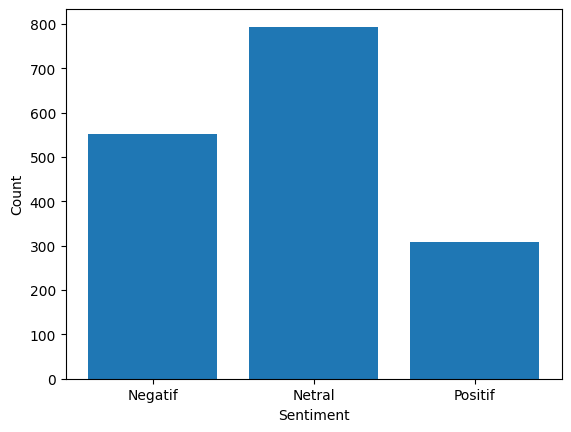

In [ ]:
own_label_counts = {
    "Negatif": n_data_df["Negatif"].sum(),
    "Netral": n_data_df["Netral"].sum(),
    "Positif": n_data_df["Positif"].sum(),
}

# Plotting
plt.bar(own_label_counts.keys(), own_label_counts.values())
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13140 entries, 0 to 13139
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviews   13140 non-null  object
 1   negative  13140 non-null  bool  
 2   neutral   13140 non-null  bool  
 3   positive  13140 non-null  bool  
dtypes: bool(3), object(1)
memory usage: 141.3+ KB


In [ ]:
n_data_df.columns = train_df.columns

In [ ]:
train_df = pd.concat([train_df, n_data_df], ignore_index=True)

In [ ]:
# train_data_df, valid_data_df = train_test_split(n_data_df, train_size=800, random_state=42)

# train_df = pd.concat([train_df, train_data_df], ignore_index=True)
# valid_df = pd.concat([valid_df, valid_data_df], ignore_index=True)

In [ ]:
neg_data = {
    'reviews': [
        "Jaringan kacau banget bgst",
        "Bgst nih aplikasi, selalu force close pas lagi penting.",
        "Pelayanannya lama banget bgst.",
        "Harga mahal kualitas nol, bgst banget deh.",
        "Udah nunggu sejam lebih bgst, masih gak ada kejelasan!",
        "Layanan cs-nya gak membantu sama sekali, bgst bener.",
        "Bgst ini barang, baru beli udah rusak.",
        "Koneksi lemot parah bgst, kapan beresnya?",
        "Refundnya lama banget, bgst gak ada solusinya.",
        "Paket datang udah hancur bgst, siapa yang tanggung jawab?",
        "Sistem sering error, bgst banget bikin emosi.",
        "Bgst layanan ini, bener-bener gak profesional.",
        "Udah bayar mahal, tapi hasil bgst begini.",
        "Sampai sekarang pesanan gak nyampe, bgst bener.",
        "Aplikasi sering bug, bgst mending gak usah dipakai.",
        "Bgst banget servernya, main game aja gak lancar.",
        "Barang palsu dikirim, bgst.",
        "Bgst udah bayar mahal tapi kualitas zonk.",
        "Pelayanannya kasar banget, bgst gak sopan.",
        "Bgst ini promo bohong, sama sekali gak sesuai janji.",
        "BGST BANGET",
        "produk bgst",
        "cs bgst",
        "ah bgst",
        "penjual bgst"
    ],
    'Negatif': [True] * 25,
    'Netral': [False] * 25,
    'Positif': [False] * 25,
}
neg_df = pd.DataFrame(neg_data)

neg_df.columns = train_df.columns

train_df = pd.concat([train_df, neg_df], ignore_index=True)

In [ ]:
print(f"Length of training data: {len(train_df)}")
print(f"Length of validation data: {len(valid_df)}")
print(f"Length of test data: {len(test_df)}")

Length of training data: 14819
Length of validation data: 1402
Length of test data: 463


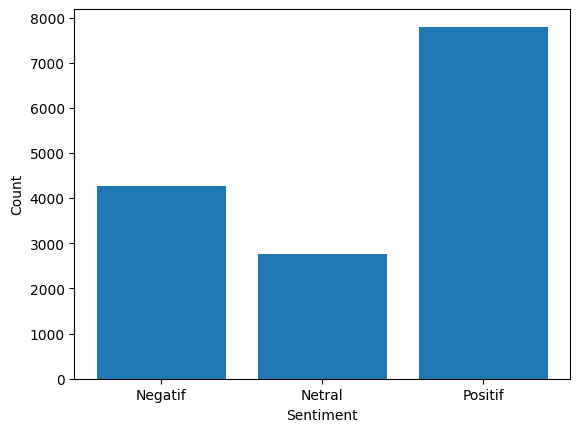

In [ ]:
label_counts = {
    "Negatif": train_df["negative"].sum(),
    "Netral": train_df["neutral"].sum(),
    "Positif": train_df["positive"].sum(),
}

# Plotting
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
import random

for i in range(10):
  random_sample = random.randint(0, len(train_df))
  print(f'Reviews: {train_df.iloc[random_sample][0]}')

Reviews: tips makan gacoan ga cepet enek senyum
Reviews: dominos_id coba yg no beda sm yg video
Reviews: malam terkesan menyeramnkan suka siang serasa sawah tidak panas oke suasana nya menenangkan
Reviews: jam malam keluarga duduk ruang sofa nyaman pemandangan lampulampu kota bandung sehabis hujan menambah romantis suasana memesan milk shake vanilla fruit punch caramel coklat waffle caramel enak harga makanan minuman nya tidak mahal
Reviews: bakmi naripan rm bakmi terkenal bandung yummy asin nya mantap teh terbaik noodle lokal in bandung
Reviews: marah jaringan indosat jelek hilang
Reviews: loker dg stay bali
Reviews: hayooo gman nie yng bner yng mna kak daging gede kecil gugup
Reviews: pemandangan menghadap lembah pepohonan menu masakan indonesian makanan makanan barat menu ala carte cake pastry masakan nya tidak spesial biasabiasa pemandangan nya bagus
Reviews: kampung daun memiliki lokasi prima perbukitan bandung utara memiliki udara sejuk pemandangan hijau menyegarkan tebtu tujuan 

<ipython-input-26-4583a879c305>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Reviews: {train_df.iloc[random_sample][0]}')


In [ ]:
kamus_alay_df = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/refs/heads/master/colloquial-indonesian-lexicon.csv')
kamus_alay_dict = kamus_alay_df.set_index('slang')['formal'].to_dict()

In [ ]:
# def df_to_dataset(df, shuffle=True, batch_size=32):
#     """
#     Converts a pandas DataFrame into a TensorFlow Dataset.
#     - `reviews` is the text input.
#     - Target columns are `negative`, `neutral`, and `positive`.
#     """
#     features = df['reviews']  # Input text
#     labels = df[['negative', 'neutral', 'positive']]  # Multi-class targets
#     ds = tf.data.Dataset.from_tensor_slices((features, labels))
#     if shuffle:
#         ds = ds.shuffle(buffer_size=len(df))
#     ds = ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
#     return ds

# # Convert the datasets
# BATCH_SIZE = 128
# train_ds = df_to_dataset(train_df, shuffle=True, batch_size=BATCH_SIZE)
# valid_ds = df_to_dataset(valid_df, shuffle=False, batch_size=BATCH_SIZE)
# test_ds = df_to_dataset(test_df, shuffle=False, batch_size=BATCH_SIZE)

In [ ]:
# def preprocess(reviews, label):
#     """
#     Preprocess the reviews using kamus_alay_dict.
#     Replace words if found in the dictionary; otherwise, keep the original word.
#     """
#     # Split the reviews into words
#     words = tf.strings.split(reviews)

#     # Map the dictionary lookup to each word
#     def replace_word(word):
#         # Use a Python dictionary lookup wrapped in tf.py_function
#         def lookup(w):
#             return kamus_alay_dict.get(w, w)  # Replace with dict value or keep the same

#         # Apply the lookup function and return
#         return tf.py_function(func=lookup, inp=[word], Tout=tf.string)

#     # Replace each word using map_fn
#     words = tf.map_fn(replace_word, words, fn_output_signature=tf.string)

#     # Join words back into a string
#     processed_review = tf.strings.reduce_join(words, separator=" ")

#     return processed_review, label



# train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
# valid_ds = valid_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
# test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

### Huggingface

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

hf_dict = load_dataset("jakartaresearch/google-play-review")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.84k [00:00<?, ?B/s]

google-play-review.py:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

default/train/0000.parquet:   0%|          | 0.00/266k [00:00<?, ?B/s]

default/validation/0000.parquet:   0%|          | 0.00/119k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7028 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3012 [00:00<?, ? examples/s]

In [ ]:
hf_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'stars'],
        num_rows: 7028
    })
    validation: Dataset({
        features: ['text', 'label', 'stars'],
        num_rows: 3012
    })
})

In [ ]:
hf_df = hf_dict['train'].to_pandas()

## Tokenize

In [ ]:
from transformers import AutoTokenizer, TFBertForSequenceClassification
# tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
# indobert_model = TFAutoModel.from_pretrained("indobenchmark/indobert-base-p2")

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
indobert_model = TFBertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", num_labels=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# import tensorflow as tf

# def tokenize(text):
#     # Tokenize the text using the tokenizer
#     return tokenizer(text, padding="max_length", truncation=True, max_length=128, return_tensors="tf")['input_ids']

# # Apply tokenization to each review
# X_train_tokenized = tf.convert_to_tensor(
#     [tokenize(text) for text in train_df['reviews']],
#     dtype=tf.int32
# )

# X_valid_tokenized = tf.convert_to_tensor(
#     [tokenize(text) for text in valid_df['reviews']],
#     dtype=tf.int32
# )

# X_test_tokenized = tf.convert_to_tensor(
#     [tokenize(text) for text in test_df['reviews']],
#     dtype=tf.int32
# )

# # Convert labels to tensors
# y_train = tf.convert_to_tensor(train_df.iloc[:, 1:].values, dtype=tf.int32)
# y_valid = tf.convert_to_tensor(valid_df.iloc[:, 1:].values, dtype=tf.int32)
# y_test = tf.convert_to_tensor(test_df.iloc[:, 1:].values, dtype=tf.int32)

# X_train_tokenized = tf.reshape(X_train_tokenized, (-1, 128))
# X_valid_tokenized = tf.reshape(X_valid_tokenized, (-1, 128))
# X_test_tokenized = tf.reshape(X_test_tokenized, (-1, 128))

# # Check the shapes of the tokenized datasets

# print(X_train_tokenized.shape)
# print(X_valid_tokenized.shape)
# print(X_test_tokenized.shape)

def tokenize(text):
    return tokenizer(text, padding="max_length", truncation=True, max_length=128, return_tensors="tf")['input_ids']

X_train_tokenized = tf.squeeze(tf.stack(train_df['reviews'].map(lambda x: tokenize(x)).tolist()), axis=1)
X_valid_tokenized = tf.squeeze(tf.stack(valid_df['reviews'].map(lambda x: tokenize(x)).tolist()), axis=1)
X_test_tokenized = tf.squeeze(tf.stack(test_df['reviews'].map(lambda x: tokenize(x)).tolist()), axis=1)

y_train = tf.convert_to_tensor(train_df.iloc[:, 1:].values)
y_valid = tf.convert_to_tensor(valid_df.iloc[:, 1:].values)
y_test = tf.convert_to_tensor(test_df.iloc[:, 1:].values)

In [ ]:
X_train_tokenized.shape

TensorShape([14819, 128])

In [ ]:
y_train.shape

TensorShape([14819, 3])

In [ ]:
tokenizer.save_pretrained("tokenizer")

('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/vocab.txt',
 'tokenizer/added_tokens.json',
 'tokenizer/tokenizer.json')

In [ ]:
# files.download('tokenizer/tokenizer_config.json')
# files.download('tokenizer/special_tokens_map.json')
# files.download('tokenizer/vocab.txt')
# files.download('tokenizer/added_tokens.json')
# files.download('tokenizer/tokenizer.json')

### Base model

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=3e-3,
    verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',     # Metric to monitor
    patience=6,                 # Number of epochs to wait before stopping
    mode='max',                 # Looking for the maximum value of val_accuracy
    restore_best_weights=True   # Restore model weights from the epoch with the best val_accuracy
)

In [ ]:
# Model nlp
base_model = tf.keras.Sequential ([
    tf.keras.Input(shape=(128, )),
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=256),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(128, activation='gelu'),
    tf.keras.layers.Dense(128, activation='gelu'),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Dense(3, activation='linear')
])

base_model.compile(
    optimizer=tf.keras.optimizers.Nadam(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 256)          7813376   
                                                                 
 bidirectional (Bidirection  (None, 256)               394240    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_38 (Dropout)        (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                        

In [ ]:
history = base_model.fit(X_train_tokenized,
                         y_train,
                         epochs=20,
                         validation_data=(X_valid_tokenized, y_valid),
                         callbacks=[early_stopping]
                        )

Epoch 1/20
411/411 [==============================] - 32s 60ms/step - loss: 0.5930 - accuracy: 0.7460 - val_loss: 0.4425 - val_accuracy: 0.8267
Epoch 2/20
411/411 [==============================] - 10s 24ms/step - loss: 0.3149 - accuracy: 0.8826 - val_loss: 0.4280 - val_accuracy: 0.8281
Epoch 3/20
411/411 [==============================] - 8s 20ms/step - loss: 0.1769 - accuracy: 0.9404 - val_loss: 0.5306 - val_accuracy: 0.8274
Epoch 4/20
411/411 [==============================] - 7s 18ms/step - loss: 0.1052 - accuracy: 0.9661 - val_loss: 0.7963 - val_accuracy: 0.8096
Epoch 5/20
411/411 [==============================] - 8s 20ms/step - loss: 0.0707 - accuracy: 0.9764 - val_loss: 0.8546 - val_accuracy: 0.8081
Epoch 6/20
411/411 [==============================] - 9s 21ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.9659 - val_accuracy: 0.8046
Epoch 7/20
411/411 [==============================] - 8s 18ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.9752 - val_accuracy: 0.81

In [ ]:
results = base_model.evaluate(X_valid_tokenized, y_valid, verbose=0)
print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")

Test Loss: 0.43
Test Accuracy: 0.83


In [ ]:
results = base_model.evaluate(X_test_tokenized, y_test, verbose=0)
print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")

Test Loss: 0.54
Test Accuracy: 0.80


In [ ]:
results = base_model.evaluate(X_train_tokenized, y_train, verbose=0)
print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")

Test Loss: 0.18
Test Accuracy: 0.95


In [ ]:
X_test = np.array(X_test_tokenized)
X_test

array([[    2,  3601,  2526, ...,     0,     0,     0],
       [    2,  5788,  1107, ...,     0,     0,     0],
       [    2,  6229,  4599, ...,     0,     0,     0],
       ...,
       [    2,   427, 24829, ...,     0,     0,     0],
       [    2,  1321,  3129, ...,     0,     0,     0],
       [    2, 10899,     5, ...,     0,     0,     0]], dtype=int32)

In [ ]:
bruh_test = np.array(y_test)
bruh_test

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [False,  True, False],
       [False, False,  True],
       [False,  True, False]])

In [ ]:
y_pred_proba = base_model.predict(X_test_tokenized)

15/15 [==============================] - 1s 5ms/step


In [ ]:
y_pred_proba.shape

(463, 3)

In [ ]:
def get_wrong_index(model, data):
  y_pred_proba = model.predict(X_test_tokenized)
  m, n = y_test.shape
  y_pred_class = np.zeros((m, n))
  for i in range(m):
    max_val = 1e-3
    max_j = -1
    for j in range(n):
      if max_val < y_pred_proba[i, j]:
        max_val = y_pred_proba[i, j]
        max_j = j
    y_pred_class[i, max_j] = 1

  wrong_index = []
  for i in range(m):
    if not np.all(bruh_test[i] == y_pred_class[i]):
      wrong_index.append(i)
  return wrong_index

In [ ]:
m, n = y_test.shape
y_pred_class = np.zeros((m, n))
for i in range(m):
  max_val = 1e-3
  max_j = -1
  for j in range(n):
    if max_val < y_pred_proba[i, j]:
      max_val = y_pred_proba[i, j]
      max_j = j
  y_pred_class[i, max_j] = 1

In [ ]:
y_pred_class

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
wrong_index = []
for i in range(m):
  if not np.all(bruh_test[i] == y_pred_class[i]):
    wrong_index.append(i)
len(wrong_index)

92

In [ ]:
wrong_index[0]

16

In [ ]:
arr = np.array([0, 2, 4])
np.argmax(arr)

2

In [ ]:
right_index = [i for i in range(m) if i not in wrong_index]

In [ ]:
wrong_index_test = get_wrong_index(base_model, X_test_tokenized)
wrong_index_val = get_wrong_index(base_model, X_valid_tokenized)

15/15 [==============================] - 0s 5ms/step


In [ ]:
def code_to_label(code):
  if code == 0:
    return 'Negative'
  elif code == 1:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
def compare_error(y_pred, y, error_index):
  for i in error_index:
    print(test_df['reviews'][i])
    print(f"Prediction: {code_to_label(np.argmax(y_pred[i]))}")
    print(f"Actual: {code_to_label(np.argmax(y[i]))}")

def compare_error_df(y_pred, y, error_index, df_source):
  df = pd.DataFrame({
      'reviews': [],
      'pred': [],
      'actual': []
  })
  for i in error_index:
    review = df_source['reviews'][i]
    pred = code_to_label(np.argmax(y_pred[i]))
    actual = code_to_label(np.argmax(y[i]))
    df.loc[len(df)] = {'reviews': review,
                      'pred': pred,
                      'actual': actual
                      }
  return df

In [ ]:
# compare_error(y_pred_class, bruh_test, wrong_index)
error_test_df = compare_error_df(y_pred_class, bruh_test, wrong_index, test_df)
error_test_df

,reviews,pred,actual
0,nya promo ribu bayar atm nya harga normal kiri...,Neutral,Negative
1,pesan tiket pesawat lancarlancar beli tiket ke...,Neutral,Negative
2,suka kesal kpopers mukulin pangsek sumpah kesa...,Positive,Negative
3,gua suka pelatih timnas u melarang pemain nya ...,Positive,Negative
4,pribadi tidak setuju jenis ajakan timnas main ...,Positive,Negative
...,...,...,...
87,buah mangga kemarin gue lihat pohon kayak nya ...,Negative,Neutral
88,perempuan suka dikasih bunga puisi pacar nya,Negative,Positive
89,indonesia banget suku beragam budaya nya mence...,Negative,Positive
90,pemimpin indonesia tantangan nya,Negative,Neutral


In [ ]:
# error_test_df.to_excel('error_test.xlsx')
# files.download('error_test.xlsx')

In [ ]:
# compare_error(y_pred_class, bruh_test, wrong_index)
error_test_df = compare_error_df(y_pred_class, bruh_test, wrong_index, test_df)
error_test_df

,reviews,pred,actual
0,nya promo ribu bayar atm nya harga normal kiri...,Neutral,Negative
1,pesan tiket pesawat lancarlancar beli tiket ke...,Neutral,Negative
2,suka kesal kpopers mukulin pangsek sumpah kesa...,Positive,Negative
3,gua suka pelatih timnas u melarang pemain nya ...,Positive,Negative
4,pribadi tidak setuju jenis ajakan timnas main ...,Positive,Negative
...,...,...,...
87,buah mangga kemarin gue lihat pohon kayak nya ...,Negative,Neutral
88,perempuan suka dikasih bunga puisi pacar nya,Negative,Positive
89,indonesia banget suku beragam budaya nya mence...,Negative,Positive
90,pemimpin indonesia tantangan nya,Negative,Neutral


In [ ]:
# compare_error(y_pred_class, bruh_test, right_index)

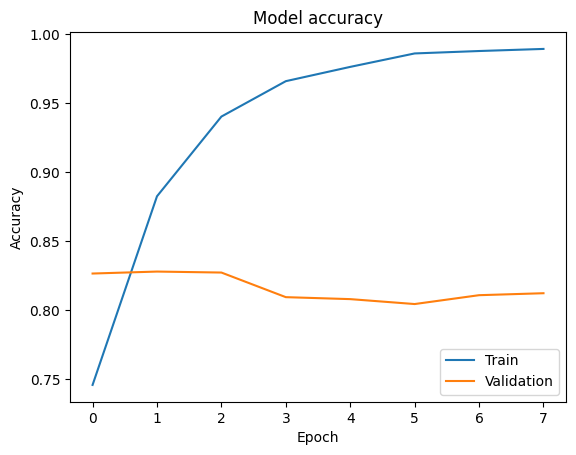

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

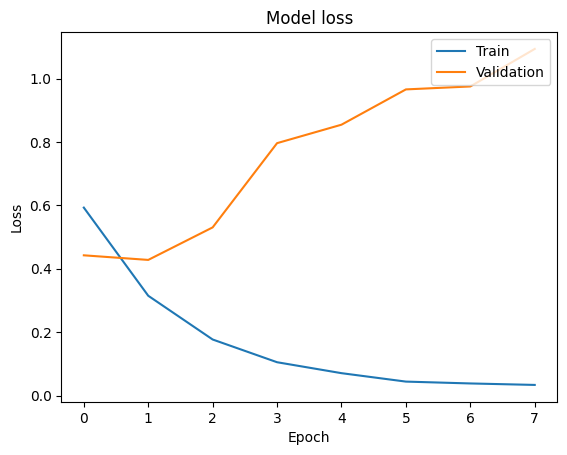

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [ ]:
base_model.save('base.h5')

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# files.download('base.h5')

## Using Indobert Embedding

In [ ]:
indobert_model.layers

In [ ]:
pretrained_embed = indobert_model.layers[0].embeddings.get_weights()[0]
pretrained_embed.shape

(50000, 768)

In [ ]:
pretrained_embed2 = indobert_model.layers[0].embeddings.get_weights()
len(pretrained_embed2)

5

In [ ]:
pretrained_embed2[1].shape

(2, 768)

In [ ]:
indobert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  124441344 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 124443651 (474.71 MB)
Trainable params: 124443651 (474.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
bert_weights = indobert_model.get_layer('bert').get_weights()

In [ ]:
bert_weights[20].shape

(768,)

In [ ]:
print(indobert_model.layers[0].embeddings.get_weights()[1].shape)
print(indobert_model.layers[0].embeddings.get_weights()[2].shape)
print(indobert_model.layers[0].embeddings.get_weights()[3].shape)
print(indobert_model.layers[0].embeddings.get_weights()[4].shape)

(2, 768)
(512, 768)
(768,)
(768,)


In [ ]:
# from tensorflow.keras import Sequential, layers

# def get_indobert_embeddings(texts):
#     # Convert input tensor to list of strings
#     texts = [str(text.numpy().decode("utf-8")) for text in texts]
#     inputs = tokenizer(texts, return_tensors="tf", padding=True, truncation=True)
#     outputs = indobert_model(**inputs)
#     cls_embeddings = outputs.last_hidden_state[:, 0, :]  # Extract [CLS] token embedding
#     return cls_embeddings

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, )),
    # tf.keras.layers.Lambda(lambda x: tf.py_function(func=get_indobert_embeddings, inp=[x], Tout=tf.float32),
    #               input_shape=(1,), dtype=tf.string),
    tf.keras.layers.Embedding(input_dim=50000,
                     output_dim=768,
                     weights=[pretrained_embed],
                     trainable=False
                     ),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    # tf.keras.layers.Attention(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='linear')
])


# Compile the model
model.compile(optimizer=tf.keras.optimizers.Nadam(1e-2), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 128, 768)            │      38,400,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         918,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,351,811 (150.12 MB)

 Trainable params: 951,811 (3.63 MB)

 Non-trainable params: 38,400,000 (146.48 MB)

In [ ]:
# input_layer = tf.keras.Input(shape=(128,))

# pretrained_embedding_layer = Sequential([
#     layers.Embedding(input_dim=50000,
#               output_dim=768,
#               weights=[pretrained_embed],
#               trainable=False),
#     layers.Dense(128)
# ])

# custom_embedding_layer = Sequential([
#     layers.Embedding(input_dim=VOCAB_SIZE,
#               output_dim=256,
#               trainable=True,
#               input_length=None),
#     layers.Dense(128)
# ])

# pretrained_embedding = pretrained_embedding_layer(input_layer)
# custom_embedding = custom_embedding_layer(input_layer)

# merged_embedding = layers.Concatenate()([pretrained_embedding, custom_embedding])

# model_v2 = Sequential([
#     layers.Input(shape=(128, )),
#     tf.keras.models.Model(inputs=input_layer, outputs=merged_embedding),
#     layers.Bidirectional(layers.LSTM(128)),
#     layers.Dropout(0.25),
#     layers.Dense(128, activation='gelu'),
#     # layers.Dense(256, activation='gelu'),
#     layers.Dropout(0.25),
#     layers.Dense(3, activation='linear')
# ])

# model_v2.compile(optimizer=tf.keras.optimizers.Nadam(1e-), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# model_v2.summary()

In [ ]:
# bert_layer = indobert_model.get_layer('bert')
# bert_layer.output

# x = tf.keras.layers.Dense(512, activation='linear')(bert_layer)
# x = tf.keras.layers.Dropout(0.25)(x)
# x = tf.keras.layers.Dense(3, activation='linear')(x)

# model = tf.keras.Model(inputs=indobert_model.input, outputs=x)

# model(optimizer=tf.keras.optimizers.Nadam(1e-2), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# model.summary()

In [ ]:
from tensorflow.keras import layers, Model
import tensorflow as tf

input_layer = layers.Input(shape=(128,))

embedding_layer = layers.Embedding(input_dim=50000, output_dim=768, weights=[pretrained_embed], trainable=False)(input_layer)
bi_lstm = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding_layer)

attention_output = layers.Attention()([bi_lstm, bi_lstm])

pooled_output = layers.GlobalAveragePooling1D()(attention_output)

dense1 = layers.Dense(128, activation='relu')(pooled_output)
dropout = layers.Dropout(0.3)(dense1)
output_layer = layers.Dense(3, activation='linear')(dropout)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(3e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 128, 768)       │     38,400,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 128, 768)       │      3,840,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128, 1536)      │              0 │ embedding[0][0],       │
│                           │                        │                │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 128, 256)       │      1,704,960 │ concatenate[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 128, 256)       │              0 │ bidirectional[0][0],   │
│                           │                        │                │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 256)            │              0 │ attention[0][0]        │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         32,896 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 3)              │            387 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 43,978,243 (167.76 MB)

 Trainable params: 5,578,243 (21.28 MB)

 Non-trainable params: 38,400,000 (146.48 MB)

In [ ]:
# # paralel attention

# from tensorflow.keras import layers

# def cbam_block(input_feature, ratio=8):
#     # Channel attention module
#     channel = layers.GlobalAveragePooling1D()(input_feature)
#     channel = layers.Dense(input_feature.shape[-1] // ratio, activation='relu')(channel)
#     channel = layers.Dense(input_feature.shape[-1], activation='sigmoid')(channel)
#     channel_attention = layers.Multiply()([input_feature, channel])

#     # Spatial attention module
#     spatial = layers.Conv1D(filters=1, kernel_size=7, padding='same', activation='sigmoid')(channel_attention)
#     spatial_attention = layers.Multiply()([channel_attention, spatial])

#     return spatial_attention

# input_layer = layers.Input(shape=(128,))
# embedding_layer = layers.Embedding(input_dim=50000, output_dim=768, weights=[pretrained_embed], trainable=False)(input_layer)
# bi_lstm = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(embedding_layer)

# self_attention_output = layers.MultiHeadAttention(num_heads=8, key_dim=128)(bi_lstm, bi_lstm)

# additive_attention_output = layers.AdditiveAttention()([bi_lstm, bi_lstm])

# concatenated_attention = layers.Concatenate()([self_attention_output, additive_attention_output])

# cbam_output = cbam_block(concatenated_attention)

# pooled_output = layers.GlobalAveragePooling1D()(cbam_output)
# dense1 = layers.Dense(128, activation='relu')(pooled_output)
# dropout = layers.Dropout(0.3)(dense1)
# output_layer = layers.Dense(3, activation='linear')(dropout)

# model = Model(inputs=input_layer, outputs=output_layer)

# model.compile(optimizer=tf.keras.optimizers.Nadam(1e-3),
#               loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.summary()

In [ ]:
# history = model_v2.fit(X_train_tokenized, y_train,
#                     epochs=20,
#                     validation_data=(X_valid_tokenized, y_valid),
#                     callbacks=[early_stopping]
#                     )
def lr_schedule(epoch, lr):
    if epoch >= 6:
        return 1e-4
    return lr

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1)

history = model.fit(X_train_tokenized, y_train,
                    epochs=30,
                    validation_data=(X_valid_tokenized, y_valid),
                    callbacks=[early_stopping, reduce_lr]
                    )

Epoch 1/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 187s 403ms/step - accuracy: 0.8210 - loss: 0.4565 - val_accuracy: 0.8238 - val_loss: 0.4573 - learning_rate: 0.0030
Epoch 2/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 200s 401ms/step - accuracy: 0.8742 - loss: 0.3218 - val_accuracy: 0.8224 - val_loss: 0.4612 - learning_rate: 0.0030
Epoch 3/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 201s 399ms/step - accuracy: 0.9073 - loss: 0.2409 - val_accuracy: 0.8331 - val_loss: 0.4978 - learning_rate: 0.0030
Epoch 4/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 201s 397ms/step - accuracy: 0.9319 - loss: 0.1860 - val_accuracy: 0.8217 - val_loss: 0.5520 - learning_rate: 0.0030
Epoch 5/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 203s 400ms/step - accuracy: 0.9533 - loss: 0.1327 - val_accuracy: 0.8252 - val_loss: 0.6764 - learning_rate: 0.0030
Epoch 6/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 208s 413ms/step - accuracy: 0.9680 - loss: 0.0949 - val_accuracy: 0.8252 - val_loss: 0.7733 - learning_rate: 0.0030
Epoch 7/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 190s 409ms/step - accura

In [ ]:
results = model.evaluate(X_valid_tokenized, y_valid, verbose=0)
print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")

In [ ]:
results = model.evaluate(X_test_tokenized, y_test, verbose=0)
print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")

In [ ]:
results = model.evaluate(X_train_tokenized, y_train, verbose=0)
print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")

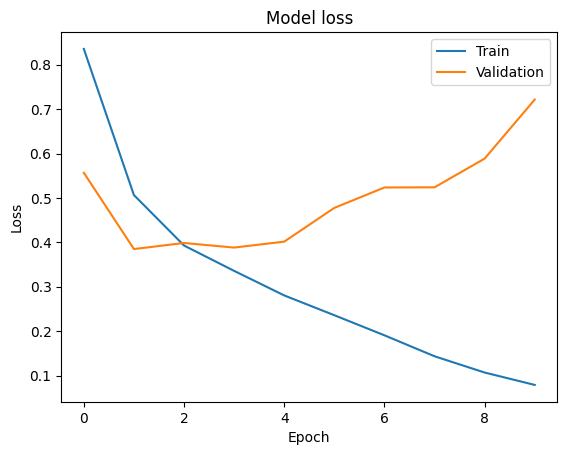

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

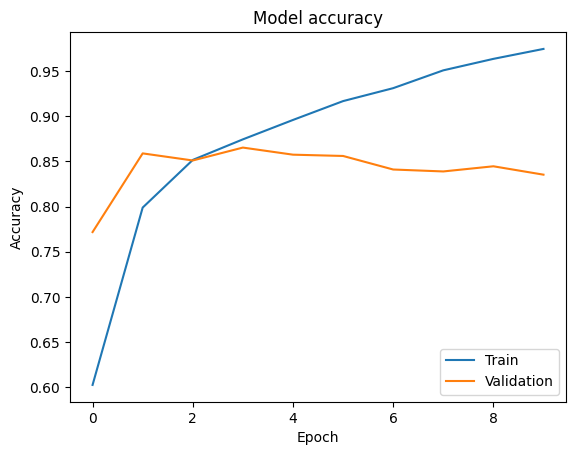

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

In [ ]:
model.save('bert_attention_adam_v2.h5')

In [ ]:
files.download('bert_attention_v1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>